In [36]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import SpectralClustering
## define bucket in which you are trying to reach
s3 = boto3.resource('s3')
bucket_name = 'daltondencklau-data445-bucket'
bucket = s3.Bucket(bucket_name)

## define csv file to read in the bucket
file_key= 'circle_data.csv'

## syntax to allow us to read the file
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## reading the data file
circles = pd.read_csv(file_content_stream)
circles.head()

,x,y
0,0.421362,0.161185
1,-0.385647,0.449012
2,0.425654,-0.100170
3,-0.574566,0.741009
4,-0.255552,0.572340


In [37]:
circles.shape

(1000, 2)

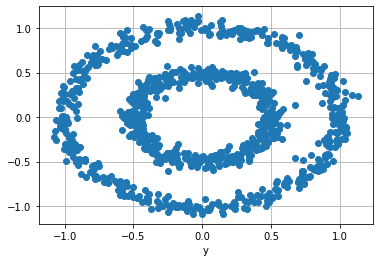

In [38]:
## visualizing the data ('o': gives circlular data points)
plt.plot(circles['x'], circles['y'], 'o')
plt.xlabel('x')
plt.xlabel('y')
plt.grid()
plt.show()

In [39]:
## standardizing the data
scaler = MinMaxScaler()
circles[['x_0_1', 'y_0_1']] = scaler.fit_transform(circles)

In [40]:
circles

,x,y,x_0_1,y_0_1
0,0.421362,0.161185,0.677955,0.562456
1,-0.385647,0.449012,0.313458,0.692048
2,0.425654,-0.100170,0.679893,0.444782
3,-0.574566,0.741009,0.228130,0.823518
4,-0.255552,0.572340,0.372217,0.747576
...,...,...,...,...
995,0.227031,-0.509298,0.590182,0.260575
996,0.070092,0.561475,0.519298,0.742684
997,-0.761880,0.584458,0.143527,0.753032
998,0.356828,0.903999,0.648807,0.896903


In [41]:
## running spectural clustering (cluster = 2)
spectral_cluster = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', n_neighbors = 20).fit(circles[['x_0_1', 'y_0_1']])



In [42]:
## apending the cluster labels
circles['spectral_cluster'] = spectral_cluster.labels_
circles.head()

,x,y,x_0_1,y_0_1,spectral_cluster
0,0.421362,0.161185,0.677955,0.562456,0
1,-0.385647,0.449012,0.313458,0.692048,0
2,0.425654,-0.100170,0.679893,0.444782,0
3,-0.574566,0.741009,0.228130,0.823518,1
4,-0.255552,0.572340,0.372217,0.747576,0


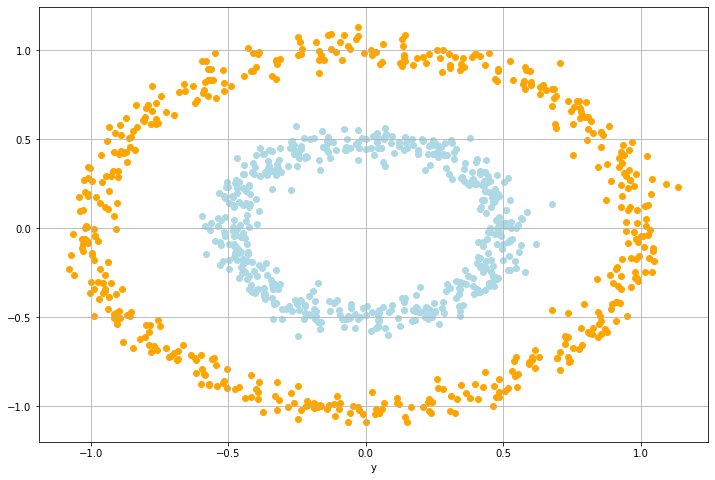

In [44]:
## visuzlizing the results
colors = ['lightblue', 'orange']

plt.figure(figsize = (12,8))
plt.xlabel('x')
plt.xlabel('y')
plt.grid()

for i in circles['spectral_cluster'].unique():
    temp = circles[circles['spectral_cluster'] == i]
    plt.scatter(temp['x'], temp['y'], color = colors[i])